# Linear Regression

### Creating the data

In [78]:
import random
import torch
from torch import nn, optim
import math
from IPython import display

In [79]:
from res.plot_lib import plot_data, plot_model, set_default
from matplotlib import pyplot as plt

In [80]:
set_default()

In [81]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [82]:
seed = 1
random.seed(seed)
torch.manual_seed(seed)
N = 1000 # num samples per class
D = 1 # dimensions
C = 1 # num classes
H = 100 # num hidden units

In [83]:
X = torch.unsqueeze(torch.linspace(-1 , 1, 100), dim = 1).to(device)
y = X.pow(3) + 0.3 * torch.rand(X.size()).to(device)

In [84]:
print("Shapes: ")
print("X: ", tuple(X.size()))
print("y: ", tuple(y.size()))

Shapes: 
X:  (100, 1)
y:  (100, 1)


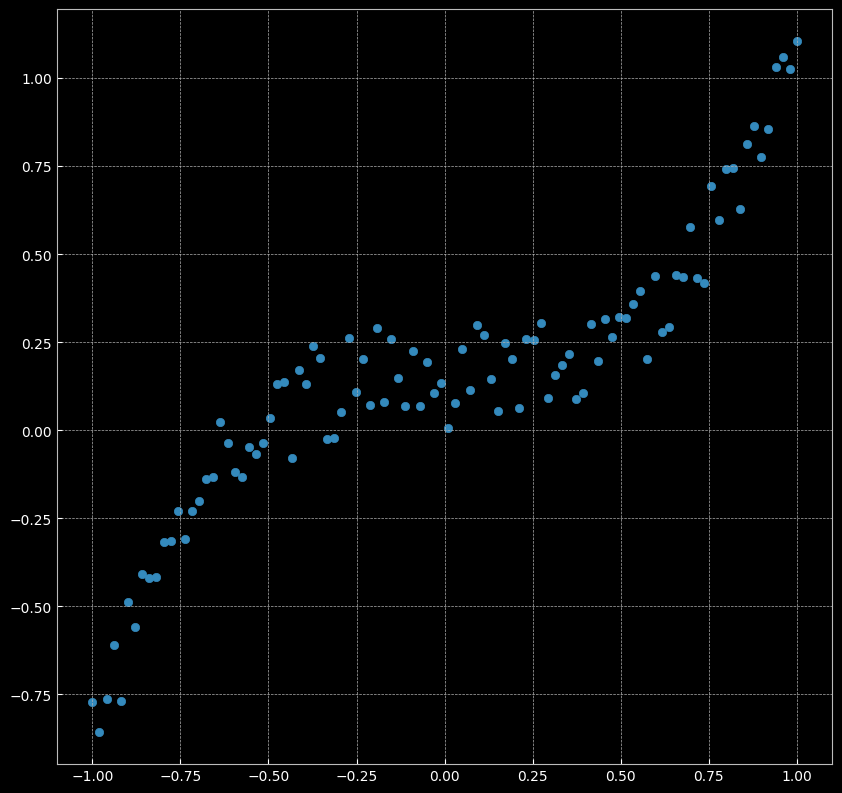

In [85]:
plt.scatter(X.cpu().numpy(), y.cpu().numpy())
plt.axis('equal');

## Linear Model

In [86]:
learning_rate = 1e-3
lambda_l2 = 1e-5

In [87]:
# creating a sequential block with the linear models
model = nn.Sequential(
        nn.Linear(D, H),
        nn.Linear(H, C)
)

model.to(device)

# using mean squared error as the loss function in this regression model
criterion = torch.nn.MSELoss()

# using SGD as the optimizer
optimizer = optim.SGD(model.parameters(), lr = learning_rate, weight_decay = lambda_l2)

# Training 
for t in range(1000):
    # the forward pass
    y_pred = model(X)

    # calculating the loss and accuracy
    loss = criterion(y_pred, y)
    if t % 100 == 0:
        print('[EPOCH]: %i, [LOSS or MSE]: %.6f' % (t, loss.item()))
    # display.clear_output() # to clear the previous print statements

    # zeroing the previous gradients
    optimizer.zero_grad()

    # calculating the gradients
    loss.backward()

    # updating parameters
    optimizer.step()

[EPOCH]: 0, [LOSS or MSE]: 0.303616
[EPOCH]: 100, [LOSS or MSE]: 0.031082
[EPOCH]: 200, [LOSS or MSE]: 0.029710
[EPOCH]: 300, [LOSS or MSE]: 0.029701
[EPOCH]: 400, [LOSS or MSE]: 0.029701
[EPOCH]: 500, [LOSS or MSE]: 0.029701
[EPOCH]: 600, [LOSS or MSE]: 0.029701
[EPOCH]: 700, [LOSS or MSE]: 0.029701
[EPOCH]: 800, [LOSS or MSE]: 0.029701
[EPOCH]: 900, [LOSS or MSE]: 0.029701


In [88]:
# plotting trained model
print(model)

Sequential(
  (0): Linear(in_features=1, out_features=100, bias=True)
  (1): Linear(in_features=100, out_features=1, bias=True)
)


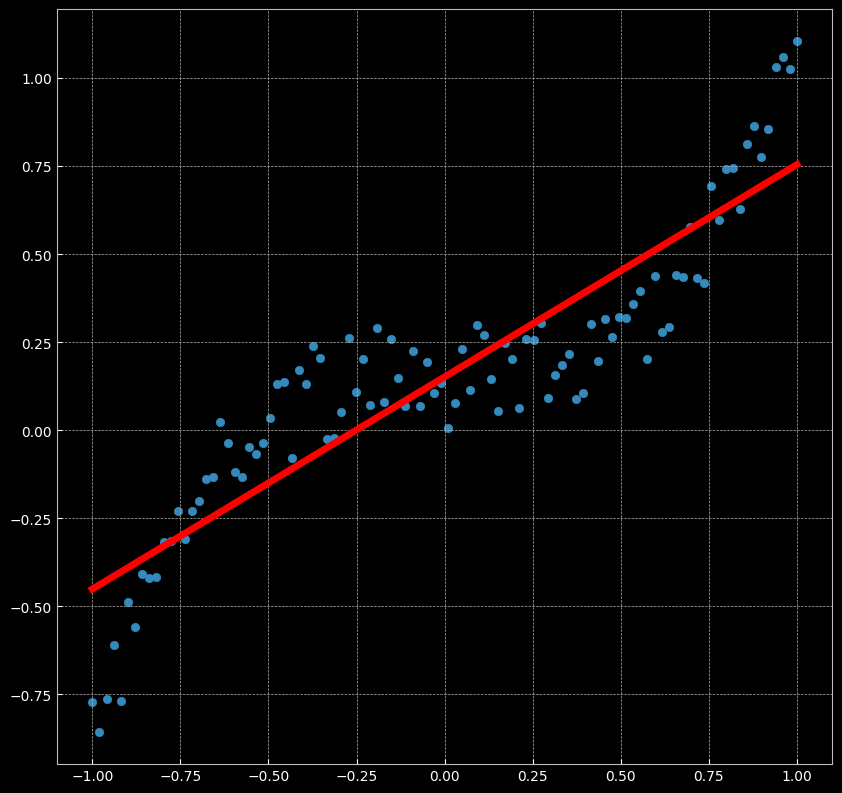

In [89]:
plt.scatter(X.data.cpu().numpy(), y.data.cpu().numpy())
plt.plot(X.data.cpu().numpy(), y_pred.data.cpu().numpy(), 'r-', lw = 5)
plt.axis('equal');

## Two Layered Network

In [90]:
learning_rate = 1e-3
lambda_l2 = 1e-5

In [91]:
# number of networks
n_networks = 10
models = list()
y_pretrain = list()

# using mean squared error as the loss
criterion = torch.nn.MSELoss()

for mod in range(n_networks):
    # creating a sequential block for the model
    model = nn.Sequential(
            nn.Linear(D, H),
            # Now we will use ReLU for half of the networks and for the rest we will use Tanh
            nn.ReLU() if mod < n_networks // 2 else nn.Tanh(),
            nn.Linear(H, C)
    )
    model.to(device)

    # appending models
    models.append(model)

    # using adam as the optimizer
    optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate, weight_decay= lambda_l2)

    # Training
    print('---------------------------------------------------------------')
    for t in range(1000):
        # the forward pass
        y_pred = model(X)

        # appending pre-train output
        if t == 0:
            y_pretrain.append(y_pred.detach())

        # computing loss and accuracy
        loss = criterion(y_pred, y)
        if t % 200 == 0:
            print(f'[MODEL]: {mod+1}, [EPOCH]: {t}, [LOSS]: {loss.item(): .6f}')
        # display.clear_output(wait = True) # to clear previous print statements

        # zeroing previous gradients
        optimizer.zero_grad()

        # calculating gradients
        loss.backward()

        # updating parameters
        optimizer.step()

---------------------------------------------------------------
[MODEL]: 1, [EPOCH]: 0, [LOSS]:  0.421412
[MODEL]: 1, [EPOCH]: 200, [LOSS]:  0.011356
[MODEL]: 1, [EPOCH]: 400, [LOSS]:  0.007029
[MODEL]: 1, [EPOCH]: 600, [LOSS]:  0.006458
[MODEL]: 1, [EPOCH]: 800, [LOSS]:  0.006326
---------------------------------------------------------------
[MODEL]: 2, [EPOCH]: 0, [LOSS]:  0.314463
[MODEL]: 2, [EPOCH]: 200, [LOSS]:  0.017429
[MODEL]: 2, [EPOCH]: 400, [LOSS]:  0.009027
[MODEL]: 2, [EPOCH]: 600, [LOSS]:  0.007279
[MODEL]: 2, [EPOCH]: 800, [LOSS]:  0.006775
---------------------------------------------------------------
[MODEL]: 3, [EPOCH]: 0, [LOSS]:  0.362945
[MODEL]: 3, [EPOCH]: 200, [LOSS]:  0.016365
[MODEL]: 3, [EPOCH]: 400, [LOSS]:  0.008532
[MODEL]: 3, [EPOCH]: 600, [LOSS]:  0.007194
[MODEL]: 3, [EPOCH]: 800, [LOSS]:  0.006649
---------------------------------------------------------------
[MODEL]: 4, [EPOCH]: 0, [LOSS]:  0.174236
[MODEL]: 4, [EPOCH]: 200, [LOSS]:  0.011120
[MOD

In [92]:
print(models[0], models[-1])

Sequential(
  (0): Linear(in_features=1, out_features=100, bias=True)
  (1): ReLU()
  (2): Linear(in_features=100, out_features=1, bias=True)
) Sequential(
  (0): Linear(in_features=1, out_features=100, bias=True)
  (1): Tanh()
  (2): Linear(in_features=100, out_features=1, bias=True)
)


### Predictions: Before Training

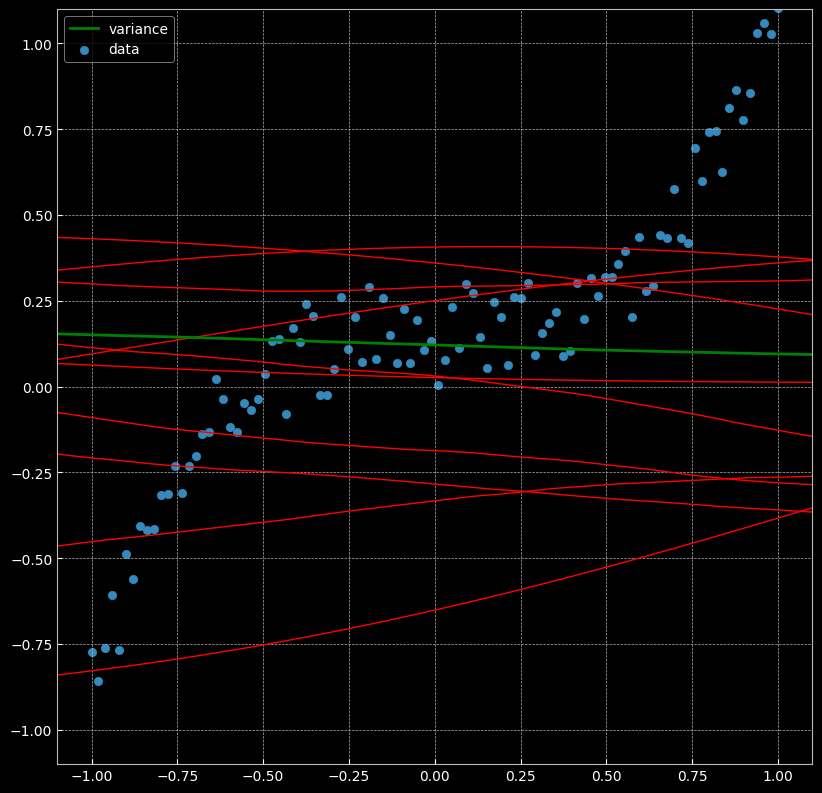

In [95]:
for y_pretrain_idx in y_pretrain:
    X_new = torch.unsqueeze(torch.linspace(-2, 2, 100), dim = 1) # using [-2, 2] to show long smooth longer lines.
    plt.plot(X_new.numpy(), y_pretrain_idx.cpu().numpy(), 'r-', lw = 1)

plt.scatter(X.cpu().numpy(), y.cpu().numpy(), label = 'data')
plt.axis('square')
plt.axis((-1.1, 1.1, -1.1, 1.1));
y_combo = torch.stack(y_pretrain)
plt.plot(X_new.numpy(), y_combo.var(dim = 0).cpu().numpy(), 'g', label = 'variance')
plt.legend();

### Predictions: After Training

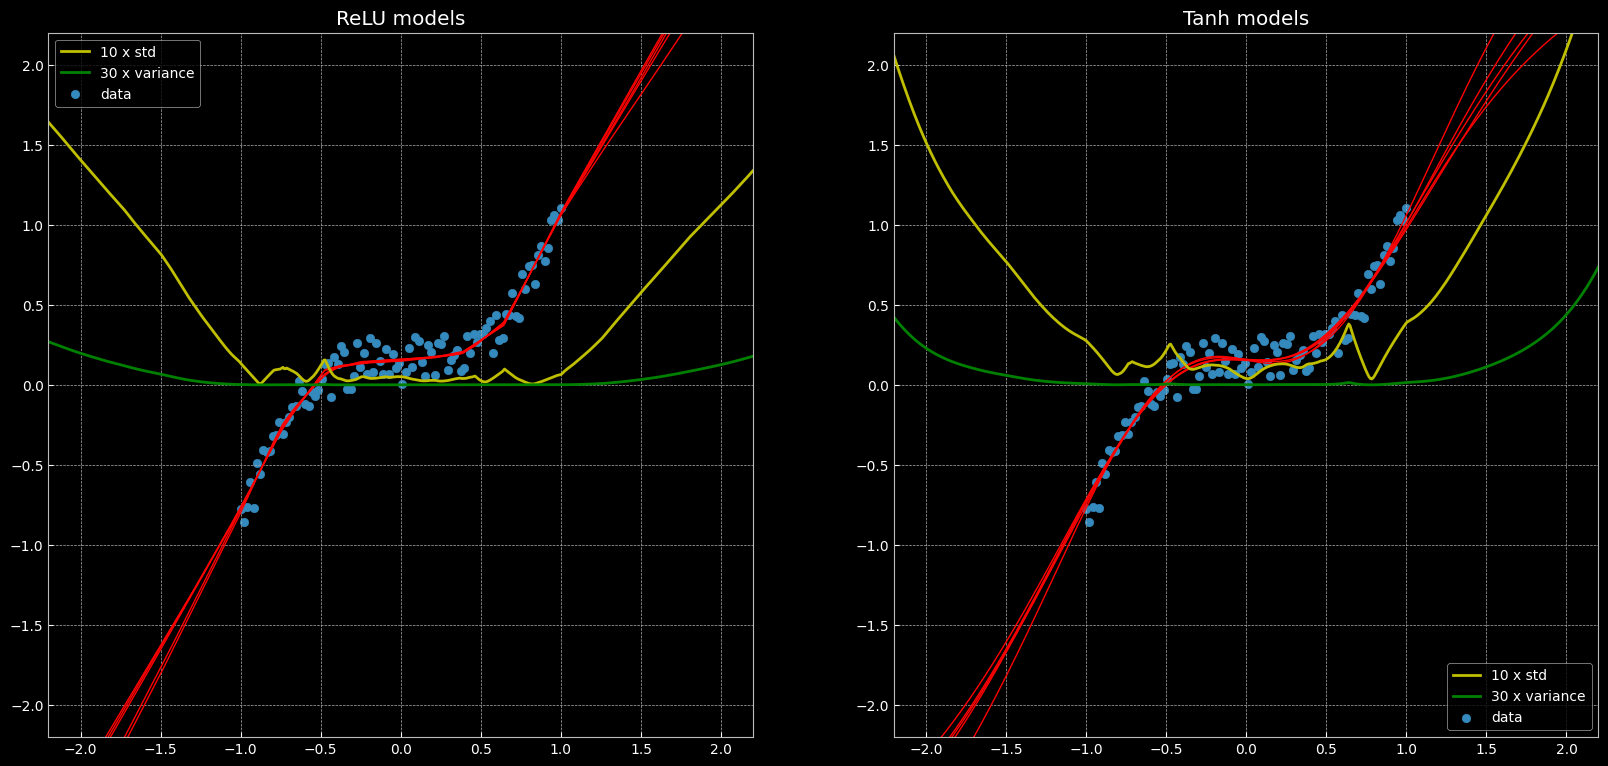

In [97]:
y_pred = list()
relu_models = models[: n_networks // 2]
tanh_models = models[n_networks // 2: ]
plt.figure(figsize= (20,10))

def dense_prediction(models, non_linearity, zoom):
    plt.subplot(1, 2, 1 if non_linearity == 'ReLU' else 2)
    for model in models:
        X_new = torch.unsqueeze(torch.linspace(-4, 4, 1001), dim = 1).to(device)

        # gettting predictions from inputs
        with torch.no_grad():
            y_pred.append(model(X_new))

        plt.plot(X_new.cpu().numpy(), y_pred[-1].cpu().numpy(), 'r-', lw = 1)
    plt.scatter(X.cpu().numpy(), y.cpu().numpy(), label = 'data')
    plt.axis('square')
    plt.axis(torch.tensor((-1.1, 1.1, -1.1, 1.1)) * zoom);
    y_combo = torch.stack(y_pred)
    plt.plot(X_new.cpu().numpy(), 10 * y_combo.var(dim = 0).cpu().sqrt().numpy(), 'y', label = '10 x std')
    plt.plot(X_new.cpu().numpy(), 10 * y_combo.var(dim = 0).cpu().numpy(), 'g', label = '30 x variance')
    plt.legend()
    plt.title(non_linearity + ' models')

z = 2 # try 1 or 4
dense_prediction(relu_models, 'ReLU', zoom = z)
dense_prediction(tanh_models, 'Tanh', zoom = z)